In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

STUD_PATH = '/mnt/workspace_stud/'
DATA_PATH = f'{STUD_PATH}mbentse/'
METADATA_PATH = f'{STUD_PATH}stud5/metadata/liver_sample_9_metadata.tsv'
OUTPUT_PATH = f'{STUD_PATH}stud2/notebooks/'
MOUSE_PATH = f'{STUD_PATH}stud2/scATAC_prepro/output_mus_musculus/data/sample1/'

results_file = f'{OUTPUT_PATH}liver_09_test.h5ad'

In [3]:
adata = ad.read(f'{DATA_PATH}catlas_objects/liver_sample_9.h5ad')
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)
adata

AnnData object with n_obs × n_vars = 17500 × 1154611

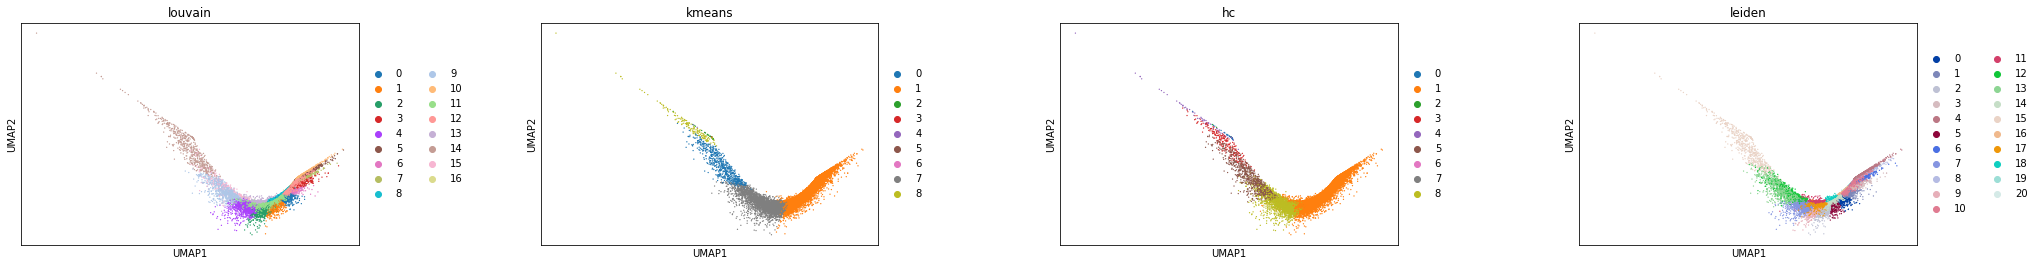

In [9]:
epi.pp.lazy(adata)
epi.tl.louvain(adata)
epi.tl.leiden(adata)
epi.pl.umap(adata, color=['louvain', 'leiden'], wspace=0.4)

In [5]:
adata.obs

,nb_features
index,
liver_sample_9_1+AACCAATAACATATGGTACCGTTCGTCTGACAGTCGGCAA,7397
liver_sample_9_1+AACCAATAACATGCTAACCTGTCGACCATTACCAGTTATT,5722
liver_sample_9_1+AACCAATAACCTAAGAGTTACGTTGATGATGAGAAGACCA,10445
liver_sample_9_1+AACCAATAACCTGGCAGCGGTTCTGGCGCACCGGTTAAGT,9986
liver_sample_9_1+AACCAATAACGGTCTAGGAACATATTGCATGAGATACCTC,7689
...,...
liver_sample_9_1+TTGGACGCGGTAGAACCTCCGATCCATAACTTAATTCGTA,1055
liver_sample_9_1+TTGGAGAACGGCATTAGGCGTTGCCTTATCTTGCTCGATT,2871
liver_sample_9_1+AATTATCTTGGAATGCCTTGTTCTGGCGCACAGTCGGCAA,6782


In [3]:
adata = ad.read(f'{DATA_PATH}catlas_objects/liver_sample_9.h5ad')
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)
adata

AnnData object with n_obs × n_vars = 17500 × 1151566
    obs: 'nb_features'
    var: 'n_cells'

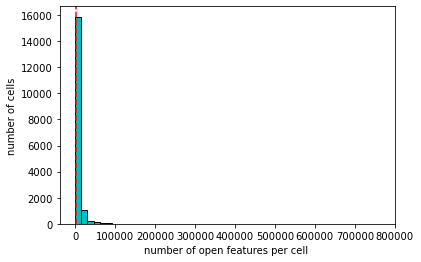

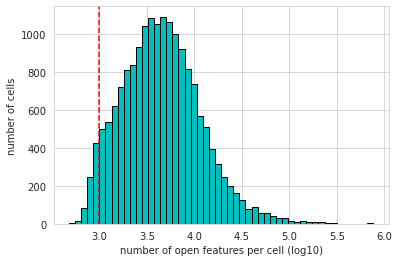

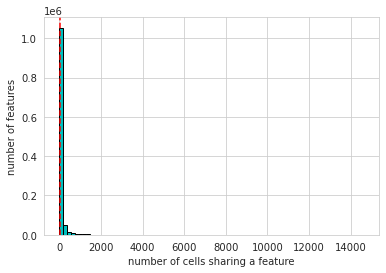

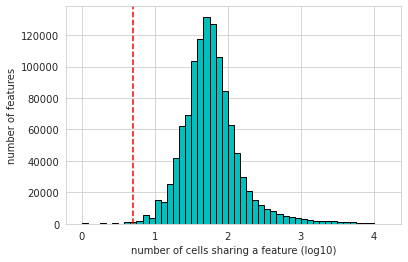

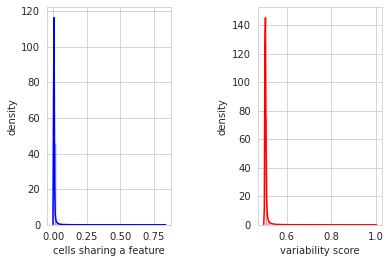

In [6]:
min_features = 1000

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features)
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features)

min_cells = 5

epi.pp.coverage_features(adata, binary=True, log=False, bins=50,
               threshold=min_cells)
epi.pp.coverage_features(adata, binary=True, log=10, bins=50,
               threshold=min_cells)

epi.pp.cal_var(adata)

epi.pp.normalize_total(adata)

epi.pp.log1p(adata)

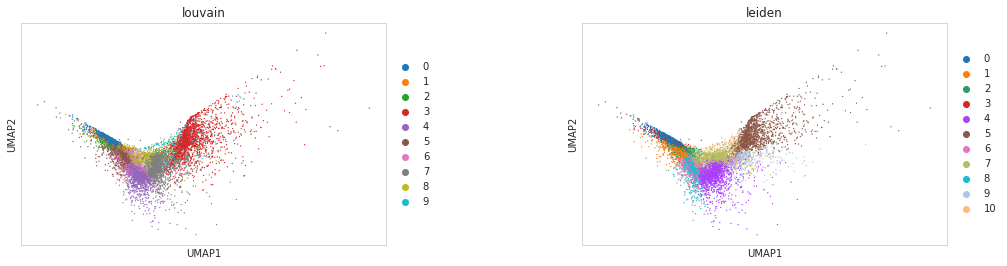

In [14]:
#ohne log
epi.pp.lazy(adata)
epi.tl.louvain(adata)
epi.tl.leiden(adata)
epi.pl.umap(adata, color=['louvain', 'leiden'], wspace=0.4)

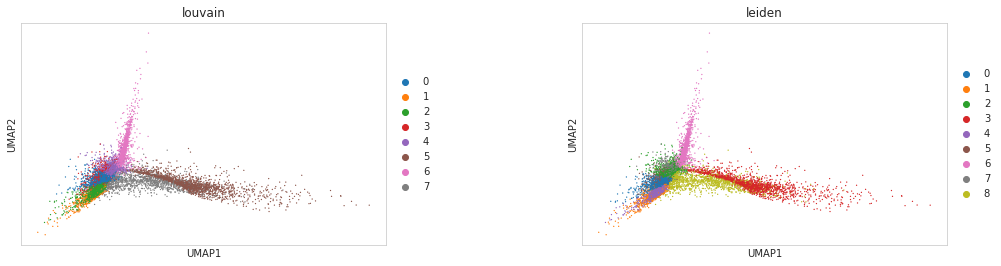

In [7]:
#mit log
epi.pp.lazy(adata)
epi.tl.louvain(adata)
epi.tl.leiden(adata)
epi.pl.umap(adata, color=['louvain', 'leiden'], wspace=0.4)

In [13]:
adata

AnnData object with n_obs × n_vars = 17500 × 1151566
    obs: 'nb_features', 'louvain', 'leiden'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'